In [1]:
!pip install ctgan pandas matplotlib seaborn
!pip install --upgrade --force-reinstall numpy torch

#run on colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 53.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:824: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /pytorch/aten/src/ATen/cuda/CublasHandlePool.cpp:181.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


   YearlyIncome  TotalChildren  NumberCarsOwned  NumberChildrenAtHome  \
0         53658              0                1                     0   
1         36040              3                2                     0   
2         78215              1                1                     0   
3         51138              0                1                     0   
4         25219              0                1                     0   

   BikeBuyer  
0          1  
1          0  
2          0  
3          0  
4          0  


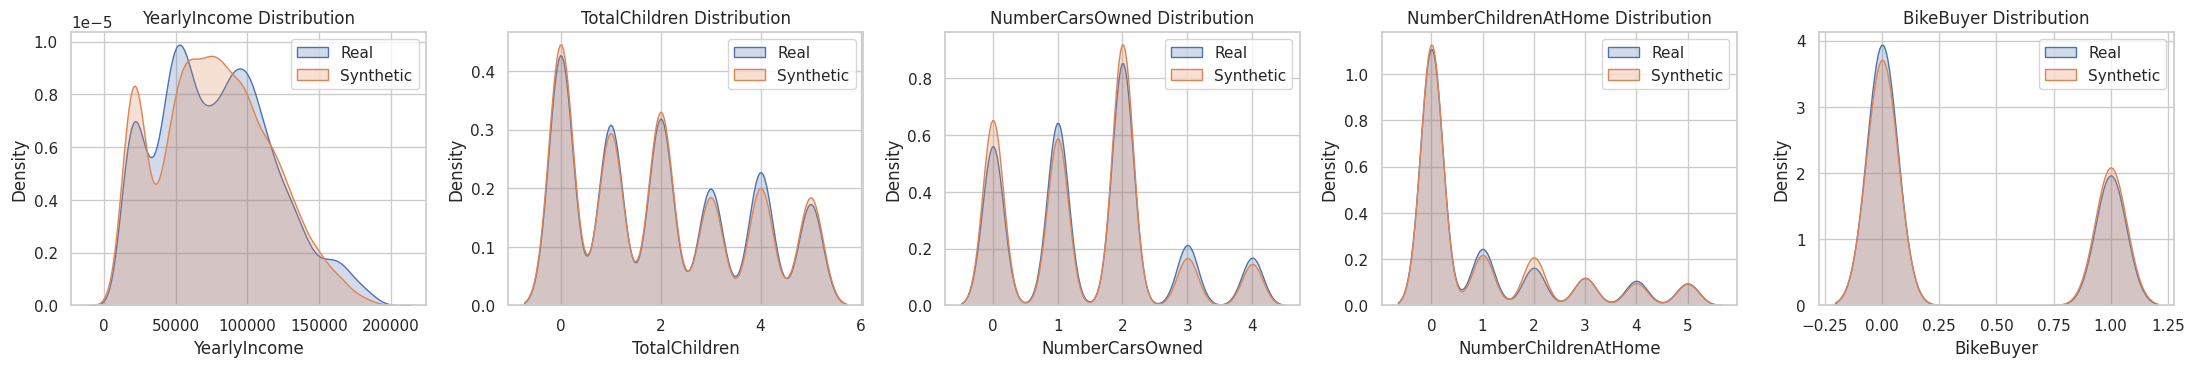

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ctgan import CTGAN

# Load dataset
url = 'https://raw.githubusercontent.com/gretelai/gdpr-helpers/main/data/adventure-works-bike-buying.csv'
data = pd.read_csv(url)

# Select relevant numeric columns
columns_to_use = [
    'YearlyIncome', 'TotalChildren', 'NumberCarsOwned',
    'NumberChildrenAtHome', 'BikeBuyer'
]
data_clean = data[columns_to_use].dropna().copy()

# Initialize and train CTGAN
ctgan = CTGAN(epochs=300)
ctgan.fit(data_clean)

# Generate synthetic data
synthetic_data = ctgan.sample(len(data_clean))

# Preview synthetic data
print(synthetic_data.head())

# Plot comparison distributions
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, len(columns_to_use), figsize=(22, 4))

for i, col in enumerate(columns_to_use):
    sns.kdeplot(data_clean[col], label='Real', ax=axes[i], fill=True)
    sns.kdeplot(synthetic_data[col], label='Synthetic', ax=axes[i], fill=True)
    axes[i].set_title(f'{col} Distribution')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [ ]:
synthetic_data.head()

In [ ]:
data_clean